*By AISH KUMAR JESRANI*

-- Titanic - Machine Learning from Disaster

-- https://www.kaggle.com/competitions/titanic/overview

*👋🛳️ Ahoy, welcome to Kaggle! You’re in the right place. This is the legendary Titanic ML competition – the best, first challenge for you to dive into ML competitions and familiarize yourself with how the Kaggle platform works. The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck. Read on or watch the video below to explore more details. Once you’re ready to start competing, click on the "Join Competition button to create an account and gain access to the competition data. Then check out Alexis Cook’s Titanic Tutorial that walks you through step by step how to make your first submission!*

In [225]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

import warnings
warnings.filterwarnings(action="ignore")


from sklearn. model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import shap
import xgboost as xgb
from xgboost import XGBRegressor
from catboost import Pool
from catboost import CatBoostRegressor

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge, Ridge, LogisticRegression
from sklearn.model_selection import RepeatedKFold, KFold, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, IsolationForest, VotingRegressor
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler, Normalizer, OneHotEncoder, RobustScaler
from sklearn.feature_selection import mutual_info_regression
from sklearn.cluster import KMeans


In [226]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.shape, test.shape

((891, 12), (418, 11))

# 1. Data Exploration

In [227]:
train.info()
print('-' * 40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [228]:
print(train.isnull().sum())
print('-' * 40)
test.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------------------------------------


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [229]:
print(train.describe())
print('-' * 40)
test.describe()

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
----------------------------------------


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [230]:
print(train[['Pclass', 'Survived']].groupby(['Pclass']).mean())
print('-' * 40)
print(train[['Sex', 'Survived']].groupby(['Sex']).mean())
print('-' * 40)
print(train[['Embarked', 'Survived']].groupby(['Embarked']).mean())
print('-' * 40)
print(train[['SibSp', 'Survived']].groupby(['SibSp']).mean())
print('-' * 40)
print(train[['Parch', 'Survived']].groupby(['Parch']).mean())

        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363
----------------------------------------
        Survived
Sex             
female  0.742038
male    0.188908
----------------------------------------
          Survived
Embarked          
C         0.553571
Q         0.389610
S         0.336957
----------------------------------------
       Survived
SibSp          
0      0.345395
1      0.535885
2      0.464286
3      0.250000
4      0.166667
5      0.000000
8      0.000000
----------------------------------------
       Survived
Parch          
0      0.343658
1      0.550847
2      0.500000
3      0.600000
4      0.000000
5      0.200000
6      0.000000


<Figure size 864x432 with 0 Axes>

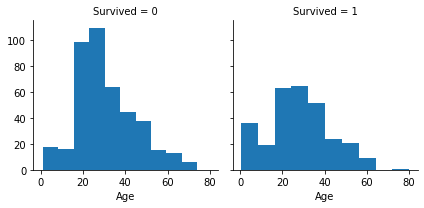

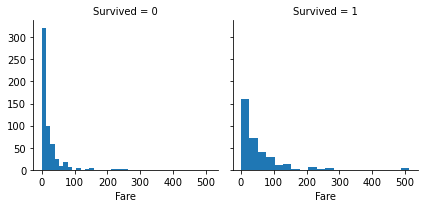

In [231]:
plt.figure(figsize = (12,6))
age = sns.FacetGrid(train, col='Survived')
age.map(plt.hist, 'Age', bins=10)
plt.show()
fare = sns.FacetGrid(train, col='Survived')
fare.map(plt.hist, 'Fare', bins=20)
plt.show()

<AxesSubplot:xlabel='Fare', ylabel='Density'>

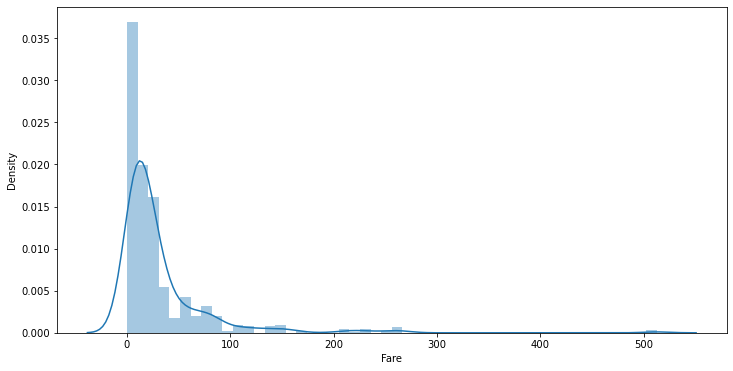

In [232]:
plt.figure(figsize = (12,6))
sns.distplot(train['Fare'], kde = True, hist=True)

# 2. Data Cleaning

### -- *Datatype Change*

In [233]:
# CHANGE DATATYPE of Pclass column because technically they are categorical

train['Pclass'] = train['Pclass'].astype('str')
test['Pclass'] = test['Pclass'].astype('str')

train['Fare'] = train['Fare'].astype('float')
test['Fare'] = test['Fare'].astype('float')

### -- *Missing Values*

In [234]:
# MISSING VALUES

#FARE

train['Fare'] = np.where(train['Fare'] == 0, np.nan, train['Fare'])
test['Fare'] = np.where(test['Fare'] == 0, np.nan, test['Fare'])

train['Fare'].fillna(train.groupby('Pclass')['Fare'].transform('mean'), inplace = True)
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('mean'), inplace = True)

#AGE

# train['Age'] = np.where(train['Age'] == 0, np.nan, train['Age'])
# test['Age'] = np.where(test['Age'] == 0, np.nan, test['Age'])

train['Age'].fillna(train.groupby('Pclass')['Age'].transform('mean'), inplace = True)
test['Age'].fillna(test.groupby('Pclass')['Age'].transform('mean'), inplace = True)

# EMBARKED

train['Embarked'].fillna(train['Embarked'].mode()[0], inplace = True)
test['Embarked'].fillna(train['Embarked'].mode()[0], inplace = True)

# 3. Feature Engineering

### -- *Dropping Features*

In [235]:
drop_redundant = [
                  'Cabin',
                  'Ticket',
                  'PassengerId'
                  ]

train.drop(drop_redundant, axis = 1, inplace= True)
test.drop(drop_redundant, axis = 1, inplace= True)

train.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,8.0500,S
5,0,3,"Moran, Mr. James",male,25.14062,0,0,8.4583,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.00000,0,0,51.8625,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.00000,3,1,21.0750,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00000,0,2,11.1333,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00000,1,0,30.0708,C


### -- *Creating New Features*

#### i) Name Title Feature

In [236]:
# Extracting Name Title

df = [train, test]

for dataset in df:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

for dataset in df:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', ], 'Royal')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Royal,0.347826


#### ii) *Age Group*

In [237]:
bins = [0,5,10,15,20,30,50,70,110]
labels = ['0 - 5', '5 - 10', '10 - 15', '15 - 20', '20 - 30', '30 - 50', '50 - 70', '70 - 110']

for dataset in df:
    dataset['Age_group'] = pd.cut(dataset['Age'], bins=bins, labels=labels, right=False)

#### iii) *Family members*

In [238]:
for dataset in df:
    dataset['Family_members'] = dataset['SibSp'] + dataset['Parch']

#### iv) *Alone or not*

In [239]:
for dataset in df:
    dataset['Alone'] = np.where(dataset['Family_members'] == 1, 1, 0)

#### v) *Fare Group*

In [240]:
for dataset in df:
    dataset['Fare_Group'] = pd.qcut(dataset['Fare'], 4)

In [241]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age_group,Family_members,Alone,Fare_Group
0,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,7.2500,S,Mr,20 - 30,1,1,"(4.010999999999999, 7.925]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,71.2833,C,Mrs,30 - 50,1,1,"(31.275, 512.329]"
2,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,7.9250,S,Miss,20 - 30,0,0,"(4.010999999999999, 7.925]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,53.1000,S,Mrs,30 - 50,1,1,"(31.275, 512.329]"
4,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,8.0500,S,Mr,30 - 50,0,0,"(7.925, 14.5]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,13.0000,S,Royal,20 - 30,0,0,"(7.925, 14.5]"
887,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,30.0000,S,Miss,15 - 20,0,0,"(14.5, 31.275]"
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,23.4500,S,Miss,20 - 30,3,0,"(14.5, 31.275]"
889,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,30.0000,C,Mr,20 - 30,0,0,"(14.5, 31.275]"


In [242]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title', 'Age_group', 'Family_members', 'Alone',
       'Fare_Group'],
      dtype='object')

# 4. Finalizing For Modelling

In [243]:
# Dropping 

second_dropper = [
    'Name',
    'SibSp',
    'Parch',
    'Age',
    'Fare'
]

train = train.drop(second_dropper, axis = 1)
test = test.drop(second_dropper, axis = 1)

In [244]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Embarked', 'Title', 'Age_group',
       'Family_members', 'Alone', 'Fare_Group'],
      dtype='object')

In [245]:
# GETTING DUMMIES

train = pd.get_dummies(train, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

In [246]:
train.describe()

,Survived,Family_members,Alone,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,...,Age_group_5 - 10,Age_group_10 - 15,Age_group_15 - 20,Age_group_20 - 30,Age_group_30 - 50,Age_group_50 - 70,Age_group_70 - 110,"Fare_Group_(7.925, 14.5]","Fare_Group_(14.5, 31.275]","Fare_Group_(31.275, 512.329]"
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,0.904602,0.180696,0.206510,0.551066,0.647587,0.086420,0.725028,0.207632,0.580247,...,0.024691,0.017957,0.096521,0.411897,0.320988,0.075196,0.007856,0.246914,0.252525,0.246914
std,0.486592,1.613459,0.384982,0.405028,0.497665,0.477990,0.281141,0.446751,0.405840,0.493796,...,0.155270,0.132871,0.295470,0.492453,0.467118,0.263856,0.088337,0.431458,0.434705,0.431458
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [247]:
# train.replace([np.inf, -np.inf], np.nan, inplace=True)

In [248]:
# we need to remove [] and other symbols from feature_names or else XGBOOST wont work

import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)

train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in train.columns.values]
test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in test.columns.values]

In [249]:
X = train.drop(['Survived'], axis = 1)
y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)

# 5. Feature Selection

In [250]:
coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
20,"Fare_Group_(31.275, 512.329_",0.473479
9,Title_Mrs,0.225717
19,"Fare_Group_(14.5, 31.275_",0.148135
11,Age_group_5 - 10,-0.001803
1,Alone,-0.029107
5,Embarked_Q,-0.292045
7,Title_Miss,-0.327911
13,Age_group_15 - 20,-0.342602
18,"Fare_Group_(7.925, 14.5_",-0.409615
0,Family_members,-0.432648


In [251]:
# Compilation Code

from sklearn import feature_selection
feature_model = pd.DataFrame(X.columns.tolist(), columns = ['Feature'])

# 1. Mutual Information Classifier

from sklearn.feature_selection import mutual_info_classif as MIC
mi_score = MIC(X, y, random_state = 100)
mi_score = pd.DataFrame(mi_score)

unimp_mic = pd.DataFrame(X.columns.tolist(), columns = ['Column'])
unimp_mic['MIC_Score'] = mi_score

# 2. Extra Trees Classifier

from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=10)
etc.fit(X, y)
unimp_mic['Tree_Score'] = etc.feature_importances_.tolist()

# 3. Logistic Regression

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X, y)
importance = logreg.coef_[0]
unimp_mic['Log_Reg'] = importance.tolist()

# 4. XGBoost

from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X, y)
unimp_mic['XGBoost'] = xgb.feature_importances_.tolist()

# Final Compilation

unimp_mic = unimp_mic.fillna(0)

feature_model['Mutual_Info'] = np.where(unimp_mic['MIC_Score'] < 0.03, 1, 0)
feature_model['Extra_Tree'] = np.where(unimp_mic['Tree_Score'] < 0.03, 1, 0)
feature_model['Log_Reg'] = np.where(unimp_mic['Log_Reg'] < 0.03, 1, 0)
feature_model['XGBoost'] = np.where(unimp_mic['XGBoost'] < 0.03, 1, 0)

feature_model['Final_Drop'] = feature_model['Mutual_Info'] + feature_model['Extra_Tree'] + feature_model['Log_Reg'] + feature_model['XGBoost']
# Drop list

model_drop_list = (feature_model[feature_model['Final_Drop'] == 4]['Feature']).tolist()
model_drop_list

['Alone',
 'Embarked_Q',
 'Age_group_5 - 10',
 'Age_group_10 - 15',
 'Age_group_15 - 20',
 'Age_group_20 - 30',
 'Age_group_70 - 110']

In [252]:
# X1 = X.drop(model_drop_list, axis = 1)
# X_train, X_test, y_train, y_test = train_test_split(X1, y, random_state = 100)

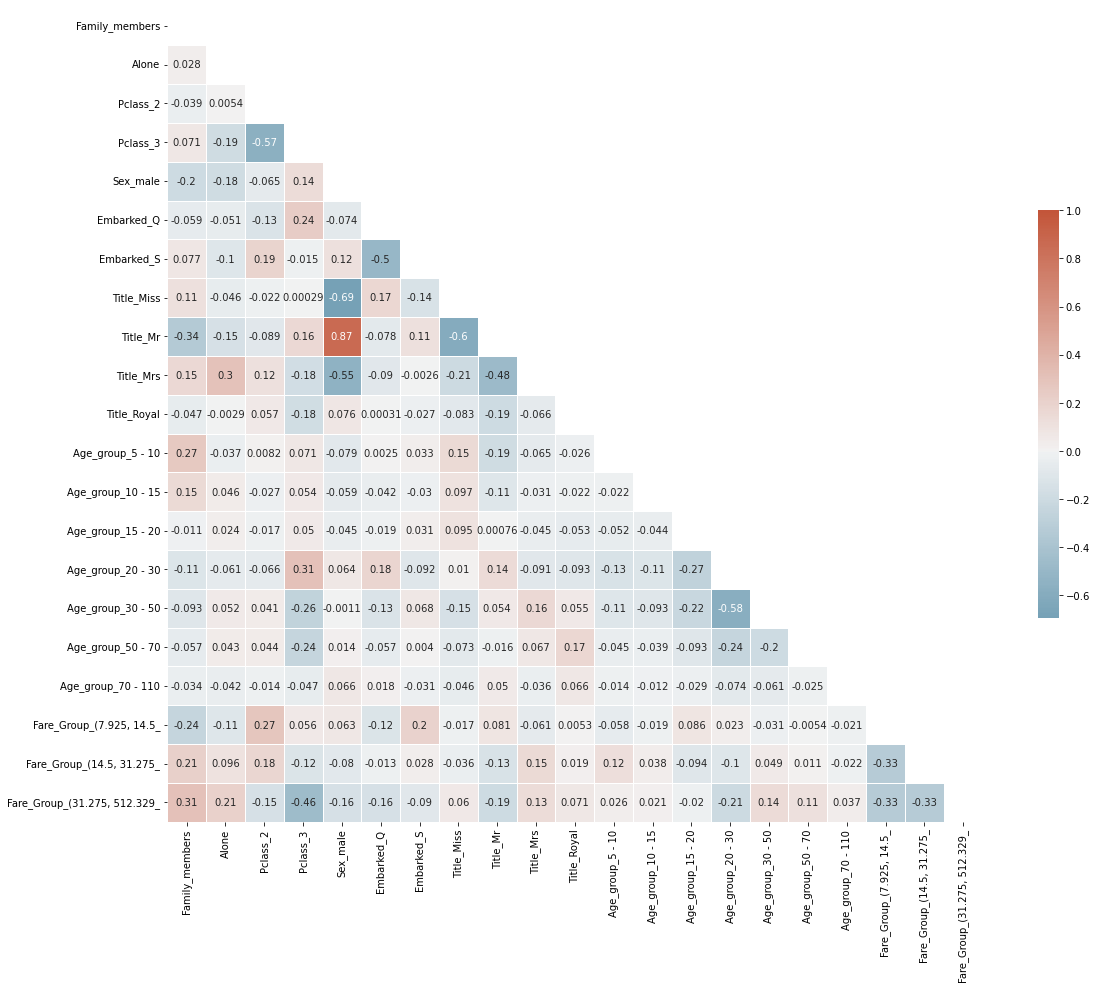

In [253]:
# Correlation Matrix

f, ax = plt.subplots(figsize=(20, 15))
mat = X.corr('pearson')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [254]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier


gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.820627802690583

In [255]:

coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
20,"Fare_Group_(31.275, 512.329_",0.473479
9,Title_Mrs,0.225717
19,"Fare_Group_(14.5, 31.275_",0.148135
11,Age_group_5 - 10,-0.001803
1,Alone,-0.029107
5,Embarked_Q,-0.292045
7,Title_Miss,-0.327911
13,Age_group_15 - 20,-0.342602
18,"Fare_Group_(7.925, 14.5_",-0.409615
0,Family_members,-0.432648


In [256]:
# All the code imports

import pandas as pd
from sklearn import datasets
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Models to test

algorithm = ['XGBoost Classifier',
             'Random Forest Classifier', 
             'Logistic Regression',
             'KNeighbour Classifier',
             'Support Vector Machines',
             'Gradient Boosting Classifier'
          ]

accuracy = []
precision = []
recall = []
f1_score = []

#Code  1 -- Without hyparameter optimization

#XGBClassifer
xg_model1 = XGBClassifier()
xg_model1.fit(X_train, y_train)
y_pred_xg = xg_model1.predict(X_test)


xg_accuracy1 = accuracy_score(y_test, y_pred_xg) * 100
xg_confusion1 = confusion_matrix(y_test, y_pred_xg)
xg_precision1 = xg_confusion1[0][0]/(xg_confusion1[0][0] + xg_confusion1[1][0]) * 100
xg_recall1 = xg_confusion1[0][0]/(xg_confusion1[0][0] + xg_confusion1[0][1]) * 100
xg_f1_score1 = ((2 * xg_precision1 * xg_recall1) / (xg_precision1 + xg_recall1)) / 100

accuracy.append(round(xg_accuracy1, 2))
precision.append(round(xg_precision1, 2))
recall.append(round(xg_recall1, 2))
f1_score.append(round(xg_f1_score1, 4))


# Random Forest Classifier
rfc_model1 = RandomForestClassifier()
rfc_model1.fit(X_train, y_train)
y_pred_rf = rfc_model1.predict(X_test)

rf_accuracy1 = accuracy_score(y_test, y_pred_rf) * 100
rf_confusion1 = confusion_matrix(y_test, y_pred_rf)
rf_precision1 = xg_confusion1[0][0]/(rf_confusion1[0][0] + rf_confusion1[1][0]) * 100
rf_recall1 = xg_confusion1[0][0]/(rf_confusion1[0][0] + rf_confusion1[0][1]) * 100
rf_f1_score1 = ((2 * rf_precision1 * rf_recall1) / (rf_precision1 + rf_recall1)) / 100

accuracy.append(round(rf_accuracy1, 2))
precision.append(round(rf_precision1, 2))
recall.append(round(rf_recall1, 2))
f1_score.append(round(rf_f1_score1, 4))


# Logistic Regression
lr_model1 = LogisticRegression(
#    class_weight='dict', 
    max_iter=1000, random_state=42)
lr_model1.fit(X_train, y_train)
y_pred_lr = lr_model1.predict(X_test)

lr_accuracy1 = accuracy_score(y_test, y_pred_lr) * 100
lr_confusion1 = confusion_matrix(y_test, y_pred_lr)
lr_precision1 = lr_confusion1[0][0]/(lr_confusion1[0][0] + lr_confusion1[1][0]) * 100
lr_recall1 = lr_confusion1[0][0]/(lr_confusion1[0][0] + lr_confusion1[0][1]) * 100
lr_f1_score1 = ((2 * lr_precision1 * lr_recall1) / (lr_precision1 + lr_recall1)) / 100

accuracy.append(round(lr_accuracy1, 2))
precision.append(round(lr_precision1, 2))
recall.append(round(lr_recall1, 2))
f1_score.append(round(lr_f1_score1, 4))

# KNN Classifier 
knn_model1 = KNeighborsClassifier()
knn_model1.fit(X_train, y_train)
y_pred_knn = knn_model1.predict(X_test)

knn_accuracy1 = accuracy_score(y_test, y_pred_knn) * 100
knn_confusion1 = confusion_matrix(y_test, y_pred_knn)
knn_precision1 = knn_confusion1[0][0]/(knn_confusion1[0][0] + knn_confusion1[1][0]) * 100
knn_recall1 = knn_confusion1[0][0]/(knn_confusion1[0][0] + knn_confusion1[0][1]) * 100
knn_f1_score1 = ((2 * knn_precision1 * knn_recall1) / (knn_precision1 + knn_recall1)) / 100

accuracy.append(round(knn_accuracy1, 2))
precision.append(round(knn_precision1, 2))
recall.append(round(knn_recall1, 2))
f1_score.append(round(knn_f1_score1, 4))

# Support Vector Machines
svm_model1 = SVC()
svm_model1.fit(X_train, y_train)
y_pred_svm = svm_model1.predict(X_test)

svm_accuracy1 = accuracy_score(y_test, y_pred_svm) * 100
svm_confusion1 = confusion_matrix(y_test, y_pred_svm)
svm_precision1 = svm_confusion1[0][0]/(svm_confusion1[0][0] + svm_confusion1[1][0]) * 100
svm_recall1 = svm_confusion1[0][0]/(svm_confusion1[0][0] + svm_confusion1[0][1]) * 100
svm_f1_score1 = ((2 * svm_precision1 * svm_recall1) / (svm_precision1 + svm_recall1)) / 100

accuracy.append(round(svm_accuracy1, 2))
precision.append(round(svm_precision1, 2))
recall.append(round(svm_recall1, 2))
f1_score.append(round(svm_f1_score1, 4))

# Gradient Boosting Classifier
gbc_model1 = GradientBoostingClassifier()
gbc_model1.fit(X_train, y_train)
y_pred_gbc = gbc_model1.predict(X_test)

gbc_accuracy1 = accuracy_score(y_test, y_pred_gbc) * 100
gbc_confusion1 = confusion_matrix(y_test, y_pred_gbc)
gbc_precision1 = gbc_confusion1[0][0]/(gbc_confusion1[0][0] + gbc_confusion1[1][0]) * 100
gbc_recall1 = gbc_confusion1[0][0]/(gbc_confusion1[0][0] + gbc_confusion1[0][1]) * 100
gbc_f1_score1 = ((2 * gbc_precision1 * gbc_recall1) / (gbc_precision1 + gbc_recall1)) / 100

accuracy.append(round(gbc_accuracy1, 2))
precision.append(round(gbc_precision1, 2))
recall.append(round(gbc_recall1, 2))
f1_score.append(round(gbc_f1_score1, 4))

metric = pd.DataFrame({
    'Alogrithms':algorithm,
    'Accuracy':accuracy,
    'Precision':precision,
    'Recall':recall,
    'F1 Score':f1_score
})
metric

[23:28:12] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Alogrithms,Accuracy,Precision,Recall,F1 Score
0,XGBoost Classifier,80.27,78.23,90.55,0.8394
1,Random Forest Classifier,82.51,79.86,90.55,0.8487
2,Logistic Regression,80.27,79.02,88.98,0.8370
3,KNeighbour Classifier,82.51,80.56,91.34,0.8561
4,Support Vector Machines,81.61,80.28,89.76,0.8476
5,Gradient Boosting Classifier,82.06,79.59,92.13,0.8540


In [257]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

model = GradientBoostingClassifier()
parameters = {"learning_rate"   : sp_randFloat(),
                "subsample"    : sp_randFloat(),
                "n_estimators" : sp_randInt(100, 1000),
                "max_depth"    : sp_randInt(4, 10)
                }


randm = RandomizedSearchCV(estimator=model, param_distributions = parameters,
                            cv = 2, n_iter = 10, n_jobs=-1)
randm.fit(X_train, y_train)

print(" Results from Random Search " )
print(" The best estimator across ALL searched params: ", randm.best_estimator_)
print(" The best score across ALL searched params: ", randm.best_score_)
print(" The best parameters across ALL searched params: ", randm.best_params_)


op_randm = randm.best_estimator_
op_randm.fit(X_train, y_train)
    

 Results from Random Search 
 The best estimator across ALL searched params:  GradientBoostingClassifier(learning_rate=0.16984210634063202, max_depth=9,
                           n_estimators=739, subsample=0.9847546216953136)
 The best score across ALL searched params:  0.778443113772455
 The best parameters across ALL searched params:  {'learning_rate': 0.16984210634063202, 'max_depth': 9, 'n_estimators': 739, 'subsample': 0.9847546216953136}


GradientBoostingClassifier(learning_rate=0.16984210634063202, max_depth=9,
                           n_estimators=739, subsample=0.9847546216953136)

In [258]:
#tester = test.drop(model_drop_list2, axis = 1)
tester2 = test.drop('Title_Master', axis = 1)

final_test = op_randm.predict(tester2)
final_test = pd.DataFrame(final_test, columns=['Result'])

In [259]:
test1 = pd.read_csv('test.csv')
test2 = test1['PassengerId']
test3 = pd.DataFrame(test2)
test3['Survived'] = final_test
test3

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
test3.to_csv('1.6.csv', index = False)